# Yaorui Guo (yg2815)

# Lab #4

In [1]:
# Some preliminary set up code:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [36]:
os.chdir('/Users/gyr/Desktop/5019_Python/dataset')

w = pd.read_csv("WVS.csv")
w.head()

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,...,V224_ESMA,V228_2,V243_AU,V244_AU,V248_CS,V253_CS,V256B,V256C,sacsecval,secvalwgt
0,6,12,12,1.0,1.0,1.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300476,1.0
1,6,12,12,2.0,1.0,2.0,3.0,4.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.301905,1.0
2,6,12,12,3.0,1.0,3.0,2.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386071,1.0
3,6,12,12,4.0,1.0,1.0,3.0,4.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344405,1.0
4,6,12,12,5.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.304167,1.0


In [38]:
w.rename(columns={'V242':'age',
                  'V248':'educ', ## this asks the Highest educational level attained ## 
                    'V2':'country',
                   'V76': 'risk', ## This question asks if respondents consider themselves to be adventurous and risk-takers ##
                  'V240':'sex'}, 
                 inplace=True)

# 1. Run a simple regression, with at least two Xs in it, and interpret your results. (Did the results fit your expectations? Why? Why not?)

## Variable 'V76' is renamed 'risk', which is the question: would you please indicate this description of "it is important for a person to adventure and to take risks"whether that person is very much like you, like you, somewhat like you, not like you, or not at all like you? 

In [41]:
w.risk.value_counts()

5.0    16947
3.0    12610
4.0    12558
6.0    11083
2.0    11037
1.0     7377
Name: risk, dtype: int64


## The answer range is from 1 to 5, which represnts Very much like me(1) to Not like me(5). In other words, 1 represents a greater willingness or ability to take risk, and 5 represents the highest degree of risk aversion.

## To make the results more reasonable to interpret, I decided to reverse code the variables. So now as the value increases, it represents a higher risk tolerance or willingness.

In [42]:
## reverse code adventure variable - higher variable means Higher risk taking capacity or willingness##
w.risk = 6 - w.risk

## My question: does one's age and gender affect one's ability or willingness to take risks in China (country = 156). 

## I expect that people's willingness and ability to take risks decreases with age, and that male have a higher willingness or ability to take risks compared to female.


In [45]:
lm1 = smf.ols(formula = 'risk ~ age + C(sex)', data = w, subset = (w['country']==156)).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           2.22e-50
Time:                        15:17:33   Log-Likelihood:                -3596.1
No. Observations:                2167   AIC:                             7198.
Df Residuals:                    2164   BIC:                             7215.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.1634      0.089     35.388

## The regression results indicate that women (sex = 2) have a lower willingness or ability to take risks than men by 0.27 ponits,controlling for constant age. When gender remains constant, the ability of a person to be willing or able to take risks begins to decline by 0.027 ponits as age increases. This result is in line with my expectations.

# 2. Add an interaction term to that model that you think might moderate the original relationship between X1 and X2. Explain why you think an interaction might be present and in what direction it would work. Explain your results. Did it work out? Yes? No?

## Include an interaction between age and sex since I speculate that women will have more risk tolerance than men at a certain time. Maybe after having children, the power of mother’s love will make them stronger and selfless, and they will be more willing to take more risks for their children.

In [54]:
lm2 = smf.ols(formula = 'risk ~ age * C(sex)', data = w, subset = (w['country']==156)).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     82.08
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           2.72e-50
Time:                        16:28:29   Log-Likelihood:                -3593.8
No. Observations:                2167   AIC:                             7196.
Df Residuals:                    2163   BIC:                             7218.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.3421      0.12

In [52]:
lm3 = smf.ols(formula = 'risk ~ age * C(sex)', data = w, subset = (w['country']==840)).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                   risk   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     105.6
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           8.09e-64
Time:                        16:07:14   Log-Likelihood:                -3582.4
No. Observations:                2189   AIC:                             7173.
Df Residuals:                    2185   BIC:                             7195.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.2933      0.11

## The interaction variables results show that the decline in women's willingness and ability to take risks begins to slow with age. So we can say that female ability and willingness to take risks after a certain age are higher than male.

## However, the results are very surprising. From the graph below, it can be seen that men and women meet at about the age of 80. After the age of 80, women's willingness and ability to take risks begin to be higher than men. This is not consistent with the reason I surmised even though I guessed the result correctly. I can't give a reasonable guess as to why Chinese women have a higher risk-taking capacity than men at age 80. What we do know is that Chinese women's ability to take risks is declining at a lower rate than men's

## So I built the same model for the United States, and wanted to see if the results would be the same, but the result is that in the United States, as the age increases, the willingness or ability of men to take risks is always higher than that of women.

# 3. Extra Credit: Plot the relationship found in the interaction.

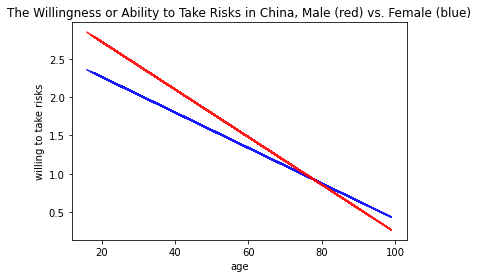

In [60]:
plt.plot(w["age"], lm2.params[0] + lm2.params[1] * 1 + lm2.params[2] * w["age"] + lm2.params[3] * 1 * w["age"], 'b', label = 'Female', alpha = 0.9)
plt.plot(w["age"], lm2.params[0] + lm2.params[1] * 0 + lm2.params[2] * w["age"] + lm2.params[3] * 0 * w["age"], 'r', label = 'Male', alpha = 0.9)
plt.title("The Willingness or Ability to Take Risks in China, Male (red) vs. Female (blue)")
plt.xlabel("age")
plt.ylabel("willing to take risks")
plt.show()

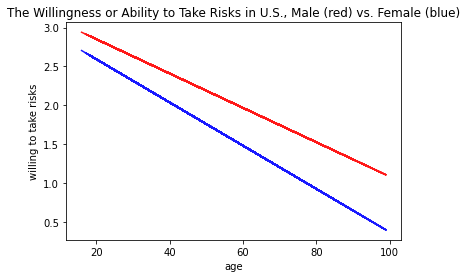

In [61]:
plt.plot(w["age"], lm3.params[0] + lm3.params[1] * 1 + lm3.params[2] * w["age"] + lm3.params[3] * 1 * w["age"], 'b', label = 'Female', alpha = 0.9)
plt.plot(w["age"], lm3.params[0] + lm3.params[1] * 0 + lm3.params[2] * w["age"] + lm3.params[3] * 0 * w["age"], 'r', label = 'Male', alpha = 0.9)
plt.title("The Willingness or Ability to Take Risks in U.S., Male (red) vs. Female (blue)")
plt.xlabel("age")
plt.ylabel("willing to take risks")
plt.show()